In [1]:
from tensorflow import keras
import tensorflow as tf
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
for moulde in tf,np,pd:
    print(moulde.__name__, moulde.__version__)

tensorflow 2.0.0
numpy 1.18.1
pandas 1.0.1


In [2]:
white_wine = 'data/wine/winequality-white.csv'
red_wine = 'data/wine/winequality-red.csv'
pd_white = pd.read_csv(white_wine,sep= ';')
pd_red = pd.read_csv(red_wine,sep = ';')

In [3]:
pd_white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
pd_red.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [5]:
pd_white['class'] = 'white'
pd_red['class'] = 'red'
pd_wine = pd.concat([pd_white, pd_red],axis = 0)
pd_wine= pd_wine.sample(frac=1)#打乱数据
pd_wine.shape

(6497, 13)

In [6]:
onehot = pd.get_dummies(pd_wine['class']).astype(np.float64)
pd_wine = pd.concat([pd_wine,onehot],axis = 1)
pd_wine.pop('class')

4254    white
1725    white
3501    white
4225    white
3117    white
        ...  
773       red
1466    white
1521    white
1151    white
4595    white
Name: class, Length: 6497, dtype: object

In [7]:
pd_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,red,white
4254,7.5,0.290,0.24,9.9,0.058,25.0,115.0,0.99567,3.15,0.46,10.9,5,0.0,1.0
1725,6.9,0.170,0.22,4.6,0.064,55.0,152.0,0.99520,3.29,0.37,9.3,6,0.0,1.0
3501,6.7,0.240,0.36,8.4,0.042,42.0,123.0,0.99473,3.34,0.52,10.9,6,0.0,1.0
4225,6.2,0.345,0.27,10.1,0.056,38.0,187.0,0.99486,3.31,0.56,10.6,5,0.0,1.0
3117,6.5,0.230,0.39,1.9,0.036,41.0,98.0,0.99000,3.19,0.43,11.9,7,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
773,7.9,0.400,0.29,1.8,0.157,1.0,44.0,0.99730,3.30,0.92,9.5,6,1.0,0.0
1466,6.9,0.190,0.49,6.6,0.036,49.0,172.0,0.99320,3.20,0.27,11.5,6,0.0,1.0
1521,6.6,0.300,0.24,1.2,0.034,17.0,121.0,0.99330,3.13,0.36,9.2,5,0.0,1.0
1151,6.8,0.320,0.18,7.5,0.041,71.0,223.0,0.99590,3.14,0.41,8.9,5,0.0,1.0


In [8]:
pd_wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
red                     0
white                   0
dtype: int64

In [9]:
pd_wine.shape

(6497, 14)

In [10]:
pd_wine.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
red                     float64
white                   float64
dtype: object

In [11]:
pd_wine.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,red,white
fixed acidity,1.000000,0.219008,0.324436,-0.111981,0.298195,-0.282735,-0.329054,0.458910,-0.252700,0.299568,-0.095452,-0.076743,0.486740,-0.486740
volatile acidity,0.219008,1.000000,-0.377981,-0.196011,0.377124,-0.352557,-0.414476,0.271296,0.261454,0.225984,-0.037640,-0.265699,0.653036,-0.653036
citric acid,0.324436,-0.377981,1.000000,0.142451,0.038998,0.133126,0.195242,0.096154,-0.329808,0.056197,-0.010493,0.085532,-0.187397,0.187397
residual sugar,-0.111981,-0.196011,0.142451,1.000000,-0.128940,0.402871,0.495482,0.552517,-0.267320,-0.185927,-0.359415,-0.036980,-0.348821,0.348821
chlorides,0.298195,0.377124,0.038998,-0.128940,1.000000,-0.195045,-0.279630,0.362615,0.044708,0.395593,-0.256916,-0.200666,0.512678,-0.512678
free sulfur dioxide,-0.282735,-0.352557,0.133126,0.402871,-0.195045,1.000000,0.720934,0.025717,-0.145854,-0.188457,-0.179838,0.055463,-0.471644,0.471644
total sulfur dioxide,-0.329054,-0.414476,0.195242,0.495482,-0.279630,0.720934,1.000000,0.032395,-0.238413,-0.275727,-0.265740,-0.041385,-0.700357,0.700357
density,0.458910,0.271296,0.096154,0.552517,0.362615,0.025717,0.032395,1.000000,0.011686,0.259478,-0.686745,-0.305858,0.390645,-0.390645
pH,-0.252700,0.261454,-0.329808,-0.267320,0.044708,-0.145854,-0.238413,0.011686,1.000000,0.192123,0.121248,0.019506,0.329129,-0.329129
sulphates,0.299568,0.225984,0.056197,-0.185927,0.395593,-0.188457,-0.275727,0.259478,0.192123,1.000000,-0.003029,0.038485,0.487218,-0.487218


In [12]:
# pd_wine['class'] = pd.Categorical(pd_wine['class'])
# pd_wine['class'] = pd_wine['class'].cat.codes
pd_wine['quality'] = pd.Categorical(pd_wine['quality'])
pd_wine['quality'] = pd_wine['quality'].cat.codes

In [13]:
pd_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,red,white
4254,7.5,0.290,0.24,9.9,0.058,25.0,115.0,0.99567,3.15,0.46,10.9,2,0.0,1.0
1725,6.9,0.170,0.22,4.6,0.064,55.0,152.0,0.99520,3.29,0.37,9.3,3,0.0,1.0
3501,6.7,0.240,0.36,8.4,0.042,42.0,123.0,0.99473,3.34,0.52,10.9,3,0.0,1.0
4225,6.2,0.345,0.27,10.1,0.056,38.0,187.0,0.99486,3.31,0.56,10.6,2,0.0,1.0
3117,6.5,0.230,0.39,1.9,0.036,41.0,98.0,0.99000,3.19,0.43,11.9,4,0.0,1.0


In [14]:
y = pd_wine.pop('quality')

In [15]:
type(y)

pandas.core.series.Series

In [16]:
y.unique()

array([2, 3, 4, 1, 5, 0, 6], dtype=int8)

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
x_train,x_test,y_train,y_test = train_test_split(pd_wine.values,y.values)
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


In [18]:
x_train

array([[ 1.07442743,  0.00829778,  0.2773875 , ..., -0.91521107,
        -0.57008175,  0.57008175],
       [ 0.22346623,  2.12632955, -1.71749825, ...,  0.34187075,
         1.75413439, -1.75413439],
       [ 0.53290667,  1.05196561, -0.4792933 , ...,  1.3475362 ,
         1.75413439, -1.75413439],
       ...,
       [ 0.99706732, -0.78980115,  1.37801413, ..., -0.07715652,
         1.75413439, -1.75413439],
       [-0.39541464, -1.28093895, -0.20413664, ..., -0.6637947 ,
        -0.57008175,  0.57008175],
       [-0.47277475, -0.72840892, -0.61687163, ..., -1.41804379,
        -0.57008175,  0.57008175]])

In [19]:
# def make_dataset(x ,y, batch_size, epoch = 10,shuffle=True):
#     ds = tf.data.Dataset.from_tensor_slices([x ,y])
#     if shuffle:
#         ds=ds.shuffle(len(x))
#     ds = ds.repeat(epoch).batch(batch_size)
#     return ds
# batch_size = 32
# train_ds = make_dataset(x_train, y_train,batch_size)
# text_ds = make_dataset(x_test,y_test,batch_size,1,shuffle = False)
    
        

In [20]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(64, input_shape = (13,),activation='relu'))
for _ in range(20):
    model.add(keras.layers.Dense(64,activation='relu'))

model.add(keras.layers.Dense(7,activation='softmax'))

# keras.losses.sparse_categorical_crossentropy
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
            metrics=['accuracy'],)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                896       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_5 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_6 (Dense)              (None, 64)                4

In [21]:
print(model.evaluate(x_test,y_test,verbose =2))
y_pred = model.predict_classes(x_test)
for true, pred in zip(y_test, y_pred):
    print(true, '--->', pred ,':','r' if true == pred else 'wrong')


1625/1 - 1s - loss: 1.9459 - accuracy: 0.0511
[1.945915894141564, 0.051076923]
2 ---> 6 : wrong
0 ---> 6 : wrong
4 ---> 2 : wrong
3 ---> 2 : wrong
2 ---> 6 : wrong
2 ---> 2 : r
2 ---> 6 : wrong
2 ---> 2 : r
2 ---> 6 : wrong
5 ---> 2 : wrong
3 ---> 6 : wrong
2 ---> 2 : r
3 ---> 0 : wrong
4 ---> 6 : wrong
3 ---> 6 : wrong
3 ---> 6 : wrong
4 ---> 0 : wrong
3 ---> 2 : wrong
3 ---> 6 : wrong
5 ---> 6 : wrong
2 ---> 6 : wrong
2 ---> 6 : wrong
3 ---> 6 : wrong
3 ---> 6 : wrong
2 ---> 6 : wrong
3 ---> 6 : wrong
3 ---> 6 : wrong
3 ---> 6 : wrong
2 ---> 6 : wrong
3 ---> 2 : wrong
3 ---> 2 : wrong
3 ---> 6 : wrong
2 ---> 2 : r
5 ---> 6 : wrong
2 ---> 6 : wrong
2 ---> 6 : wrong
4 ---> 6 : wrong
2 ---> 6 : wrong
2 ---> 6 : wrong
3 ---> 6 : wrong
2 ---> 6 : wrong
2 ---> 6 : wrong
2 ---> 6 : wrong
3 ---> 6 : wrong
3 ---> 2 : wrong
3 ---> 2 : wrong
3 ---> 6 : wrong
3 ---> 6 : wrong
2 ---> 2 : r
2 ---> 0 : wrong
2 ---> 6 : wrong
2 ---> 2 : r
3 ---> 6 : wrong
4 ---> 6 : wrong
3 ---> 2 : wrong
3 ---> 6 :

3 ---> 6 : wrong
3 ---> 2 : wrong
3 ---> 6 : wrong
3 ---> 2 : wrong
2 ---> 0 : wrong
2 ---> 6 : wrong
3 ---> 6 : wrong
3 ---> 6 : wrong
3 ---> 2 : wrong
4 ---> 6 : wrong
3 ---> 6 : wrong
3 ---> 6 : wrong
2 ---> 6 : wrong
4 ---> 6 : wrong
2 ---> 6 : wrong
3 ---> 6 : wrong
4 ---> 2 : wrong
3 ---> 2 : wrong
2 ---> 6 : wrong
3 ---> 6 : wrong
3 ---> 6 : wrong
1 ---> 6 : wrong
2 ---> 6 : wrong
3 ---> 2 : wrong
2 ---> 6 : wrong
3 ---> 6 : wrong
4 ---> 6 : wrong
3 ---> 2 : wrong
4 ---> 2 : wrong
2 ---> 6 : wrong
3 ---> 6 : wrong
2 ---> 6 : wrong
2 ---> 6 : wrong
2 ---> 0 : wrong
2 ---> 2 : r
3 ---> 6 : wrong
2 ---> 6 : wrong
2 ---> 6 : wrong
3 ---> 6 : wrong
3 ---> 6 : wrong
3 ---> 6 : wrong
3 ---> 6 : wrong
2 ---> 6 : wrong
2 ---> 6 : wrong
3 ---> 6 : wrong
3 ---> 0 : wrong
4 ---> 6 : wrong
3 ---> 6 : wrong
2 ---> 6 : wrong
0 ---> 6 : wrong
5 ---> 6 : wrong
1 ---> 6 : wrong
3 ---> 6 : wrong
2 ---> 6 : wrong
4 ---> 6 : wrong
3 ---> 2 : wrong
2 ---> 6 : wrong
2 ---> 6 : wrong
4 ---> 6 : wrong
4

3 ---> 0 : wrong
3 ---> 6 : wrong
1 ---> 2 : wrong
3 ---> 6 : wrong
3 ---> 2 : wrong
1 ---> 2 : wrong
4 ---> 1 : wrong
1 ---> 6 : wrong
3 ---> 6 : wrong
3 ---> 2 : wrong
3 ---> 6 : wrong
4 ---> 6 : wrong
2 ---> 6 : wrong
3 ---> 6 : wrong
2 ---> 6 : wrong
2 ---> 6 : wrong
5 ---> 6 : wrong
3 ---> 6 : wrong
2 ---> 6 : wrong
1 ---> 6 : wrong
4 ---> 6 : wrong
3 ---> 6 : wrong
5 ---> 1 : wrong
2 ---> 6 : wrong
4 ---> 0 : wrong
3 ---> 2 : wrong
3 ---> 6 : wrong
2 ---> 6 : wrong
2 ---> 6 : wrong
4 ---> 6 : wrong
2 ---> 6 : wrong
3 ---> 6 : wrong
3 ---> 6 : wrong
2 ---> 6 : wrong
2 ---> 6 : wrong
4 ---> 2 : wrong
3 ---> 6 : wrong
2 ---> 6 : wrong
3 ---> 6 : wrong
5 ---> 6 : wrong
3 ---> 2 : wrong
3 ---> 2 : wrong
3 ---> 6 : wrong
3 ---> 6 : wrong
3 ---> 6 : wrong
2 ---> 6 : wrong
2 ---> 6 : wrong
4 ---> 6 : wrong
4 ---> 6 : wrong
3 ---> 2 : wrong
4 ---> 6 : wrong
4 ---> 2 : wrong
4 ---> 6 : wrong
2 ---> 6 : wrong
2 ---> 2 : r
3 ---> 6 : wrong
2 ---> 6 : wrong
1 ---> 2 : wrong
2 ---> 6 : wrong
2

In [22]:
callbacks =[
    keras.callbacks.EarlyStopping(min_delta=1e-2, patience=6)
]
history = model.fit(x_train,y_train,epochs = 100,validation_split = 0.2,callbacks = callbacks)

Train on 3897 samples, validate on 975 samples
Epoch 1/100
3897/3897 [==============================] - 7s 2ms/sample - loss: 1.3844 - accuracy: 0.4113 - val_loss: 1.2109 - val_accuracy: 0.4595
Epoch 2/100
3897/3897 [==============================] - 2s 610us/sample - loss: 1.2431 - accuracy: 0.4529 - val_loss: 1.1686 - val_accuracy: 0.5231
Epoch 3/100
3897/3897 [==============================] - 2s 610us/sample - loss: 1.1699 - accuracy: 0.4865 - val_loss: 1.0788 - val_accuracy: 0.5467
Epoch 4/100
3897/3897 [==============================] - 2s 607us/sample - loss: 1.0906 - accuracy: 0.5248 - val_loss: 1.0965 - val_accuracy: 0.5241
Epoch 5/100
3897/3897 [==============================] - 2s 607us/sample - loss: 1.0674 - accuracy: 0.5438 - val_loss: 1.0162 - val_accuracy: 0.5856
Epoch 6/100
3897/3897 [==============================] - 2s 600us/sample - loss: 1.0418 - accuracy: 0.5468 - val_loss: 1.0453 - val_accuracy: 0.5508
Epoch 7/100
3897/3897 [==============================] - 2s 6

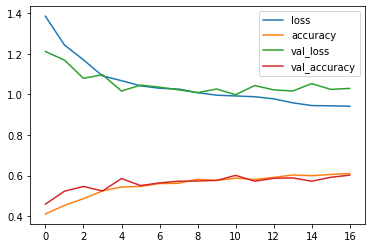

In [23]:
pd.DataFrame(history.history).plot()
plt.show()

In [24]:
print(model.evaluate(x_test,y_test,verbose =2))
y_pred = model.predict_classes(x_test)
for true, pred in zip(y_test, y_pred):
    print(true, '--->', pred ,':','r' if true == pred else 'wrong')


1625/1 - 0s - loss: 1.0621 - accuracy: 0.5508
[1.0717522434821496, 0.5507692]
2 ---> 2 : r
0 ---> 2 : wrong
4 ---> 4 : r
3 ---> 4 : wrong
2 ---> 3 : wrong
2 ---> 2 : r
2 ---> 2 : r
2 ---> 3 : wrong
2 ---> 3 : wrong
5 ---> 2 : wrong
3 ---> 2 : wrong
2 ---> 2 : r
3 ---> 2 : wrong
4 ---> 4 : r
3 ---> 2 : wrong
3 ---> 3 : r
4 ---> 3 : wrong
3 ---> 4 : wrong
3 ---> 2 : wrong
5 ---> 4 : wrong
2 ---> 2 : r
2 ---> 3 : wrong
3 ---> 3 : r
3 ---> 4 : wrong
2 ---> 3 : wrong
3 ---> 3 : r
3 ---> 2 : wrong
3 ---> 2 : wrong
2 ---> 2 : r
3 ---> 3 : r
3 ---> 2 : wrong
3 ---> 3 : r
2 ---> 2 : r
5 ---> 4 : wrong
2 ---> 2 : r
2 ---> 2 : r
4 ---> 3 : wrong
2 ---> 2 : r
2 ---> 2 : r
3 ---> 3 : r
2 ---> 2 : r
2 ---> 3 : wrong
2 ---> 2 : r
3 ---> 2 : wrong
3 ---> 4 : wrong
3 ---> 3 : r
3 ---> 3 : r
3 ---> 2 : wrong
2 ---> 3 : wrong
2 ---> 2 : r
2 ---> 3 : wrong
2 ---> 2 : r
3 ---> 3 : r
4 ---> 4 : r
3 ---> 3 : r
3 ---> 3 : r
3 ---> 2 : wrong
2 ---> 2 : r
2 ---> 2 : r
4 ---> 3 : wrong
1 ---> 2 : wrong
3 ---> 2 

3 ---> 3 : r
3 ---> 2 : wrong
3 ---> 4 : wrong
2 ---> 2 : r
2 ---> 2 : r
3 ---> 3 : r
3 ---> 2 : wrong
3 ---> 2 : wrong
4 ---> 3 : wrong
3 ---> 3 : r
3 ---> 2 : wrong
2 ---> 2 : r
4 ---> 3 : wrong
2 ---> 2 : r
3 ---> 3 : r
4 ---> 4 : r
3 ---> 2 : wrong
2 ---> 3 : wrong
3 ---> 3 : r
3 ---> 2 : wrong
1 ---> 2 : wrong
2 ---> 2 : r
3 ---> 2 : wrong
2 ---> 3 : wrong
3 ---> 3 : r
4 ---> 3 : wrong
3 ---> 3 : r
4 ---> 3 : wrong
2 ---> 2 : r
3 ---> 3 : r
2 ---> 3 : wrong
2 ---> 2 : r
2 ---> 2 : r
2 ---> 2 : r
3 ---> 2 : wrong
2 ---> 2 : r
2 ---> 2 : r
3 ---> 3 : r
3 ---> 4 : wrong
3 ---> 3 : r
3 ---> 3 : r
2 ---> 2 : r
2 ---> 2 : r
3 ---> 2 : wrong
3 ---> 3 : r
4 ---> 3 : wrong
3 ---> 4 : wrong
2 ---> 3 : wrong
0 ---> 3 : wrong
5 ---> 4 : wrong
1 ---> 2 : wrong
3 ---> 4 : wrong
2 ---> 2 : r
4 ---> 3 : wrong
3 ---> 3 : r
2 ---> 2 : r
2 ---> 2 : r
4 ---> 4 : r
4 ---> 4 : r
3 ---> 2 : wrong
4 ---> 3 : wrong
2 ---> 2 : r
2 ---> 2 : r
3 ---> 3 : r
3 ---> 3 : r
3 ---> 3 : r
4 ---> 3 : wrong
3 ---> 3 

3 ---> 2 : wrong
3 ---> 3 : r
3 ---> 3 : r
2 ---> 2 : r
2 ---> 2 : r
3 ---> 3 : r
3 ---> 2 : wrong
3 ---> 3 : r
4 ---> 2 : wrong
2 ---> 3 : wrong
3 ---> 4 : wrong
3 ---> 3 : r
3 ---> 2 : wrong
3 ---> 3 : r
3 ---> 2 : wrong
3 ---> 2 : wrong
2 ---> 2 : r
3 ---> 3 : r
3 ---> 3 : r
1 ---> 2 : wrong
3 ---> 2 : wrong
3 ---> 2 : wrong
1 ---> 2 : wrong
4 ---> 3 : wrong
1 ---> 2 : wrong
3 ---> 4 : wrong
3 ---> 3 : r
3 ---> 3 : r
4 ---> 3 : wrong
2 ---> 2 : r
3 ---> 3 : r
2 ---> 4 : wrong
2 ---> 2 : r
5 ---> 4 : wrong
3 ---> 2 : wrong
2 ---> 2 : r
1 ---> 3 : wrong
4 ---> 3 : wrong
3 ---> 3 : r
5 ---> 3 : wrong
2 ---> 2 : r
4 ---> 2 : wrong
3 ---> 3 : r
3 ---> 2 : wrong
2 ---> 2 : r
2 ---> 2 : r
4 ---> 4 : r
2 ---> 2 : r
3 ---> 3 : r
3 ---> 2 : wrong
2 ---> 2 : r
2 ---> 2 : r
4 ---> 3 : wrong
3 ---> 4 : wrong
2 ---> 2 : r
3 ---> 3 : r
5 ---> 4 : wrong
3 ---> 3 : r
3 ---> 3 : r
3 ---> 4 : wrong
3 ---> 3 : r
3 ---> 4 : wrong
2 ---> 3 : wrong
2 ---> 2 : r
4 ---> 4 : r
4 ---> 4 : r
3 ---> 2 : wrong
4

In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
tree_classifier = DecisionTreeClassifier()
forest_classifier = RandomForestClassifier()
knn_classifier = KNeighborsClassifier(n_neighbors = 5)
tree_classifier.fit(x_train,y_train)
forest_classifier.fit(x_train,y_train)
knn_classifier.fit(x_train, y_train)

t_score = tree_classifier.score(x_test,y_test)
f_score = forest_classifier.score(x_test,y_test)
k_score = knn_classifier.score(x_test, y_test)
print('{:.2f},{:.2f},{:.2f}'.format(t_score, f_score,k_score))

0.61,0.68,0.56


In [26]:
y_pred = forest_classifier.predict(x_test)
for true, pred in zip(y_test, y_pred):
    print(true, '--->', pred ,':','r' if true == pred else 'wrong')


2 ---> 2 : r
0 ---> 2 : wrong
4 ---> 4 : r
3 ---> 3 : r
2 ---> 3 : wrong
2 ---> 2 : r
2 ---> 2 : r
2 ---> 3 : wrong
2 ---> 2 : r
5 ---> 3 : wrong
3 ---> 2 : wrong
2 ---> 2 : r
3 ---> 3 : r
4 ---> 4 : r
3 ---> 2 : wrong
3 ---> 2 : wrong
4 ---> 3 : wrong
3 ---> 3 : r
3 ---> 3 : r
5 ---> 4 : wrong
2 ---> 2 : r
2 ---> 3 : wrong
3 ---> 3 : r
3 ---> 3 : r
2 ---> 2 : r
3 ---> 3 : r
3 ---> 3 : r
3 ---> 2 : wrong
2 ---> 3 : wrong
3 ---> 3 : r
3 ---> 3 : r
3 ---> 3 : r
2 ---> 2 : r
5 ---> 5 : r
2 ---> 2 : r
2 ---> 2 : r
4 ---> 4 : r
2 ---> 2 : r
2 ---> 2 : r
3 ---> 3 : r
2 ---> 2 : r
2 ---> 2 : r
2 ---> 2 : r
3 ---> 2 : wrong
3 ---> 4 : wrong
3 ---> 3 : r
3 ---> 3 : r
3 ---> 3 : r
2 ---> 3 : wrong
2 ---> 2 : r
2 ---> 3 : wrong
2 ---> 2 : r
3 ---> 3 : r
4 ---> 4 : r
3 ---> 3 : r
3 ---> 3 : r
3 ---> 2 : wrong
2 ---> 2 : r
2 ---> 3 : wrong
4 ---> 4 : r
1 ---> 3 : wrong
3 ---> 2 : wrong
3 ---> 3 : r
3 ---> 3 : r
2 ---> 2 : r
3 ---> 2 : wrong
3 ---> 3 : r
3 ---> 3 : r
3 ---> 3 : r
2 ---> 2 : r
2 --->

4 ---> 3 : wrong
3 ---> 3 : r
4 ---> 3 : wrong
2 ---> 2 : r
3 ---> 3 : r
2 ---> 3 : wrong
2 ---> 2 : r
2 ---> 2 : r
2 ---> 2 : r
3 ---> 3 : r
2 ---> 2 : r
2 ---> 2 : r
3 ---> 3 : r
3 ---> 3 : r
3 ---> 3 : r
3 ---> 3 : r
2 ---> 2 : r
2 ---> 2 : r
3 ---> 3 : r
3 ---> 3 : r
4 ---> 4 : r
3 ---> 3 : r
2 ---> 2 : r
0 ---> 3 : wrong
5 ---> 5 : r
1 ---> 1 : r
3 ---> 3 : r
2 ---> 3 : wrong
4 ---> 2 : wrong
3 ---> 2 : wrong
2 ---> 2 : r
2 ---> 3 : wrong
4 ---> 4 : r
4 ---> 3 : wrong
3 ---> 3 : r
4 ---> 3 : wrong
2 ---> 2 : r
2 ---> 2 : r
3 ---> 3 : r
3 ---> 3 : r
3 ---> 3 : r
4 ---> 4 : r
3 ---> 3 : r
2 ---> 2 : r
3 ---> 3 : r
3 ---> 2 : wrong
4 ---> 3 : wrong
3 ---> 3 : r
3 ---> 2 : wrong
3 ---> 3 : r
2 ---> 2 : r
4 ---> 4 : r
3 ---> 3 : r
2 ---> 2 : r
4 ---> 4 : r
3 ---> 2 : wrong
4 ---> 4 : r
2 ---> 2 : r
3 ---> 2 : wrong
4 ---> 4 : r
2 ---> 2 : r
2 ---> 2 : r
2 ---> 3 : wrong
4 ---> 3 : wrong
2 ---> 2 : r
2 ---> 2 : r
4 ---> 4 : r
2 ---> 2 : r
2 ---> 2 : r
2 ---> 2 : r
4 ---> 4 : r
2 ---> 2 

2 ---> 2 : r
3 ---> 3 : r
3 ---> 3 : r
5 ---> 3 : wrong
3 ---> 2 : wrong
3 ---> 3 : r
2 ---> 3 : wrong
3 ---> 3 : r
3 ---> 3 : r
3 ---> 2 : wrong
3 ---> 3 : r
3 ---> 3 : r
2 ---> 2 : r
2 ---> 2 : r
3 ---> 3 : r
3 ---> 3 : r
3 ---> 3 : r
4 ---> 4 : r
2 ---> 3 : wrong
3 ---> 4 : wrong
3 ---> 3 : r
3 ---> 2 : wrong
3 ---> 3 : r
3 ---> 2 : wrong
3 ---> 3 : r
2 ---> 2 : r
3 ---> 3 : r
3 ---> 4 : wrong
1 ---> 2 : wrong
3 ---> 2 : wrong
3 ---> 2 : wrong
1 ---> 2 : wrong
4 ---> 3 : wrong
1 ---> 1 : r
3 ---> 3 : r
3 ---> 3 : r
3 ---> 4 : wrong
4 ---> 3 : wrong
2 ---> 2 : r
3 ---> 3 : r
2 ---> 3 : wrong
2 ---> 2 : r
5 ---> 5 : r
3 ---> 2 : wrong
2 ---> 2 : r
1 ---> 3 : wrong
4 ---> 3 : wrong
3 ---> 3 : r
5 ---> 5 : r
2 ---> 2 : r
4 ---> 4 : r
3 ---> 3 : r
3 ---> 2 : wrong
2 ---> 2 : r
2 ---> 2 : r
4 ---> 3 : wrong
2 ---> 2 : r
3 ---> 3 : r
3 ---> 3 : r
2 ---> 2 : r
2 ---> 2 : r
4 ---> 3 : wrong
3 ---> 4 : wrong
2 ---> 2 : r
3 ---> 3 : r
5 ---> 5 : r
3 ---> 3 : r
3 ---> 3 : r
3 ---> 3 : r
3 ---> 

In [27]:
model.save('data/wine_model.h5')

In [28]:
load_model  = keras.models.load_model('data/wine_model.h5')
load_model.evaluate(x_test,y_test,verbose =2)

1625/1 - 1s - loss: 1.0621 - accuracy: 0.5508


[1.0717522434821496, 0.5507692]